В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from process_bank_churn import preprocess_data, preprocess_test_data

df = pd.read_csv('../Competition/train.csv')
df_test = pd.read_csv('../Competition/test.csv')
target_col = 'Exited'

df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [2]:
X_train, X_val, y_train, y_val, feature_names, scaler, encoder = preprocess_data(df, target_col)

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]
print("Validation AUC-ROC:", roc_auc_score(y_val, y_val_proba))
print("Training AUC-ROC:", roc_auc_score(y_train, y_train_proba))
print("Depth of the tree:", model.get_depth())


Validation AUC-ROC: 0.760399595110586
Training AUC-ROC: 1.0
Depth of the tree: 24


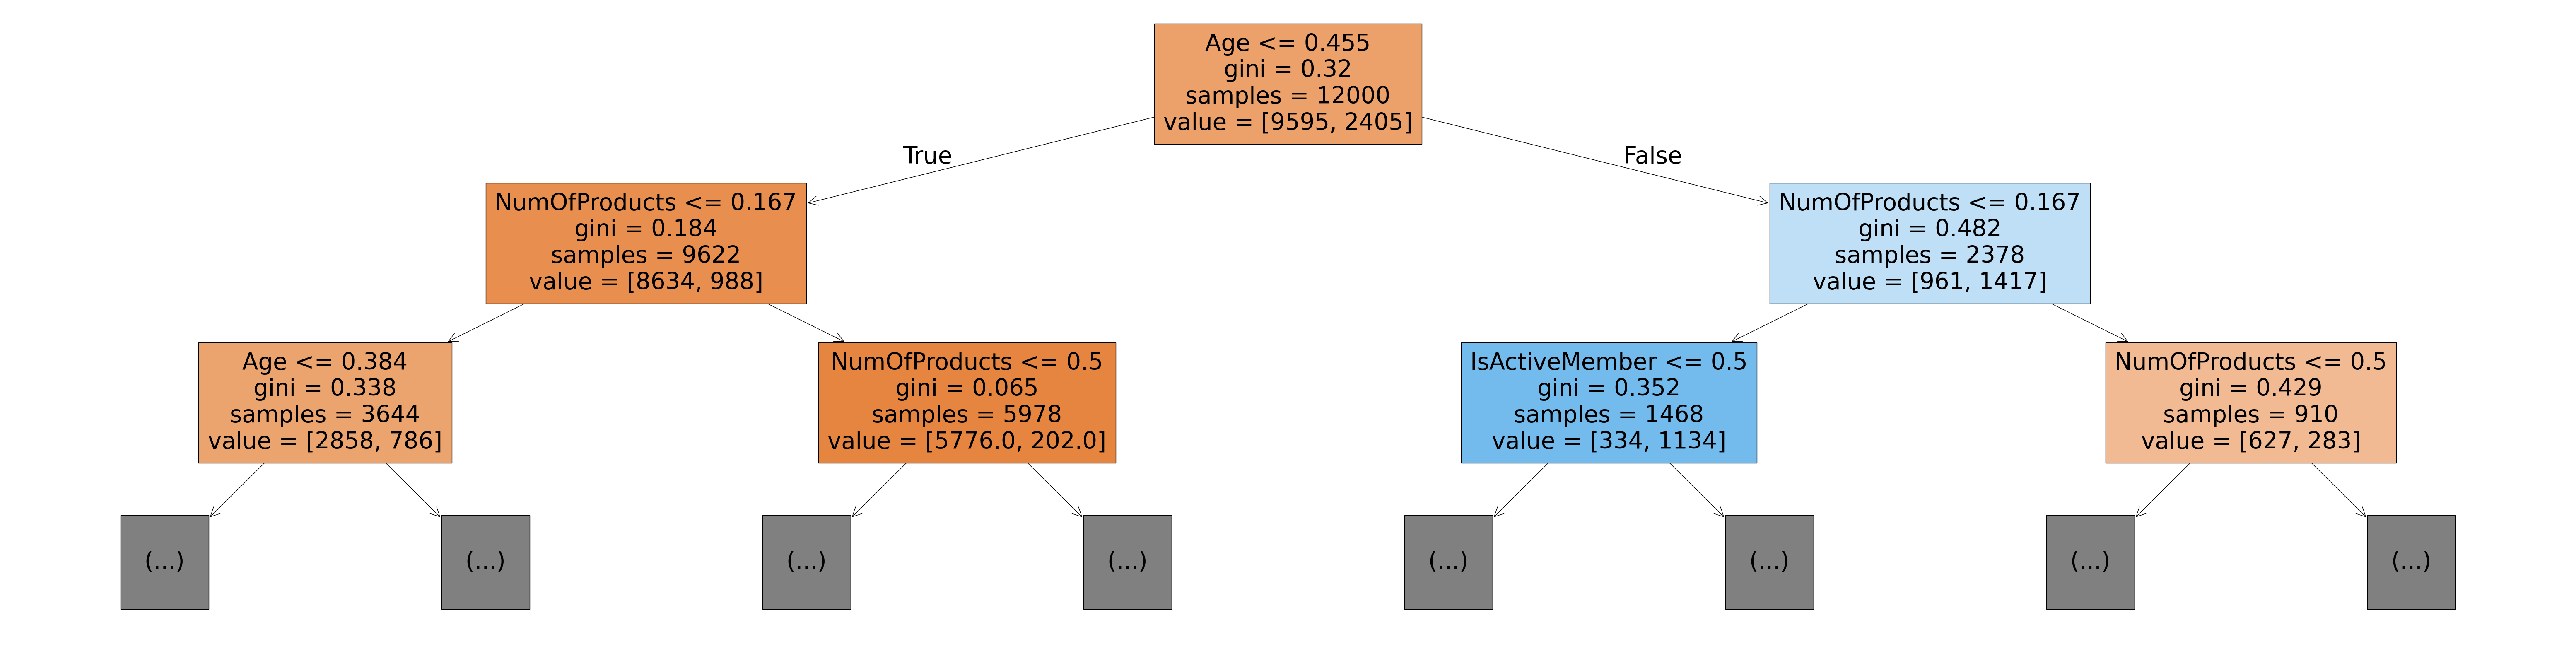

In [4]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);


З візуалізації видно що найбльш впливовими ознаками є вік, к-сть банківських продуктів і чи є клієнт активним.

In [5]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)


,feature,importance
3,Age,0.318762
6,NumOfProducts,0.170983
2,CreditScore,0.081519
9,EstimatedSalary,0.079778
1,CustomerId,0.075729
0,id,0.073839
5,Balance,0.073080
8,IsActiveMember,0.037203
4,Tenure,0.032579
11,Geography_Germany,0.017284


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [6]:
def try_parameters(max_depth=None, max_leaf_nodes=2):
    model = DecisionTreeClassifier(
        random_state=42, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes
    )
    model.fit(X_train, y_train)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    y_train_proba = model.predict_proba(X_train)[:, 1]
    print(f"max_depth={max_depth}, max_leaf_nodes={max_leaf_nodes}")
    print("Validation AUC-ROC:", roc_auc_score(y_val, y_val_proba))
    print("Training AUC-ROC:", roc_auc_score(y_train, y_train_proba))

try_parameters(max_depth=5, max_leaf_nodes=16)
try_parameters(max_depth=6, max_leaf_nodes=32)
try_parameters(max_depth=7, max_leaf_nodes=64)
try_parameters(max_depth=8, max_leaf_nodes=128)

max_depth=5, max_leaf_nodes=16
Validation AUC-ROC: 0.9108310545713945
Training AUC-ROC: 0.9135901083269506
max_depth=6, max_leaf_nodes=32
Validation AUC-ROC: 0.9211828630095685
Training AUC-ROC: 0.9271484953506839
max_depth=7, max_leaf_nodes=64
Validation AUC-ROC: 0.9105541874590694
Training AUC-ROC: 0.9338666296873696
max_depth=8, max_leaf_nodes=128
Validation AUC-ROC: 0.9027086339843051
Training AUC-ROC: 0.9415251143234467


In [7]:
max_depth = 6 
max_leaf_nodes = 32

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

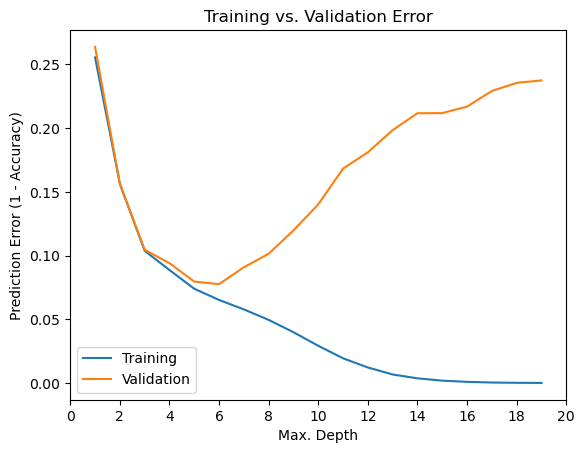

In [8]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_error = 1 - roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

depths = range(1, 20)
errors = [max_depth_error(md) for md in depths]
error_df = pd.DataFrame(errors)
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [ ]:
X_train, X_val, y_train, y_val, feature_names, scaler, encoder = preprocess_data(
        df, target_col=target_col, scale_numeric=False
    )   
model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
model.fit(X_train, y_train)

X_test = preprocess_test_data(df_test, feature_names, scaler, encoder)
test_probs = model.predict_proba(X_test)[:, 1]

submission = pd.DataFrame({
    'id': df_test['id'],   
    'Exited': test_probs.round(4)
})

submission.to_csv('submission_21022026.csv', index=False)

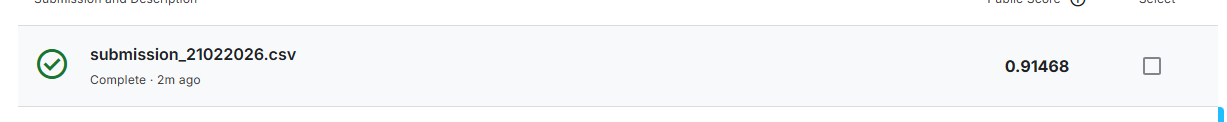

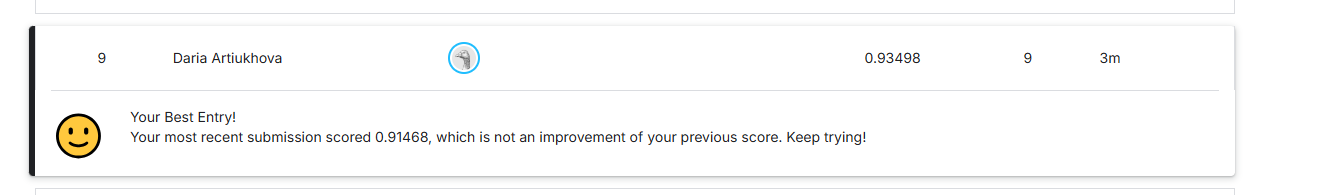